In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import matplotlib.cm as cm
from matplotlib.patches import PathPatch
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.path import Path
import matplotlib.transforms as transforms
import cmasher as cmr
from matplotlib import colormaps
import glob
sys.path.append('../analysis_scripts/tools')

import statistics_utils, plotting, correlation
from plot_utils import *

Load trials

In [2]:
trials_AGN = np.load('../../data/correlation_AGN_merged.npy', allow_pickle = True)
trials_nonAGN = np.load('../../data/correlation_non_AGN_merged.npy', allow_pickle = True)
trials_all = np.load('../../data/correlation_all_sources_merged.npy', allow_pickle = True)

Load results

In [3]:
results_AGN = np.load('../../data/correlation_AGN_results.npy', allow_pickle = True)
results_nonAGN = np.load('../../data/correlation_non_AGN_results.npy', allow_pickle = True)
results_all = np.load('../../data/correlation_all_results.npy', allow_pickle = True)

In [4]:
steps = np.arange(1,31,1)

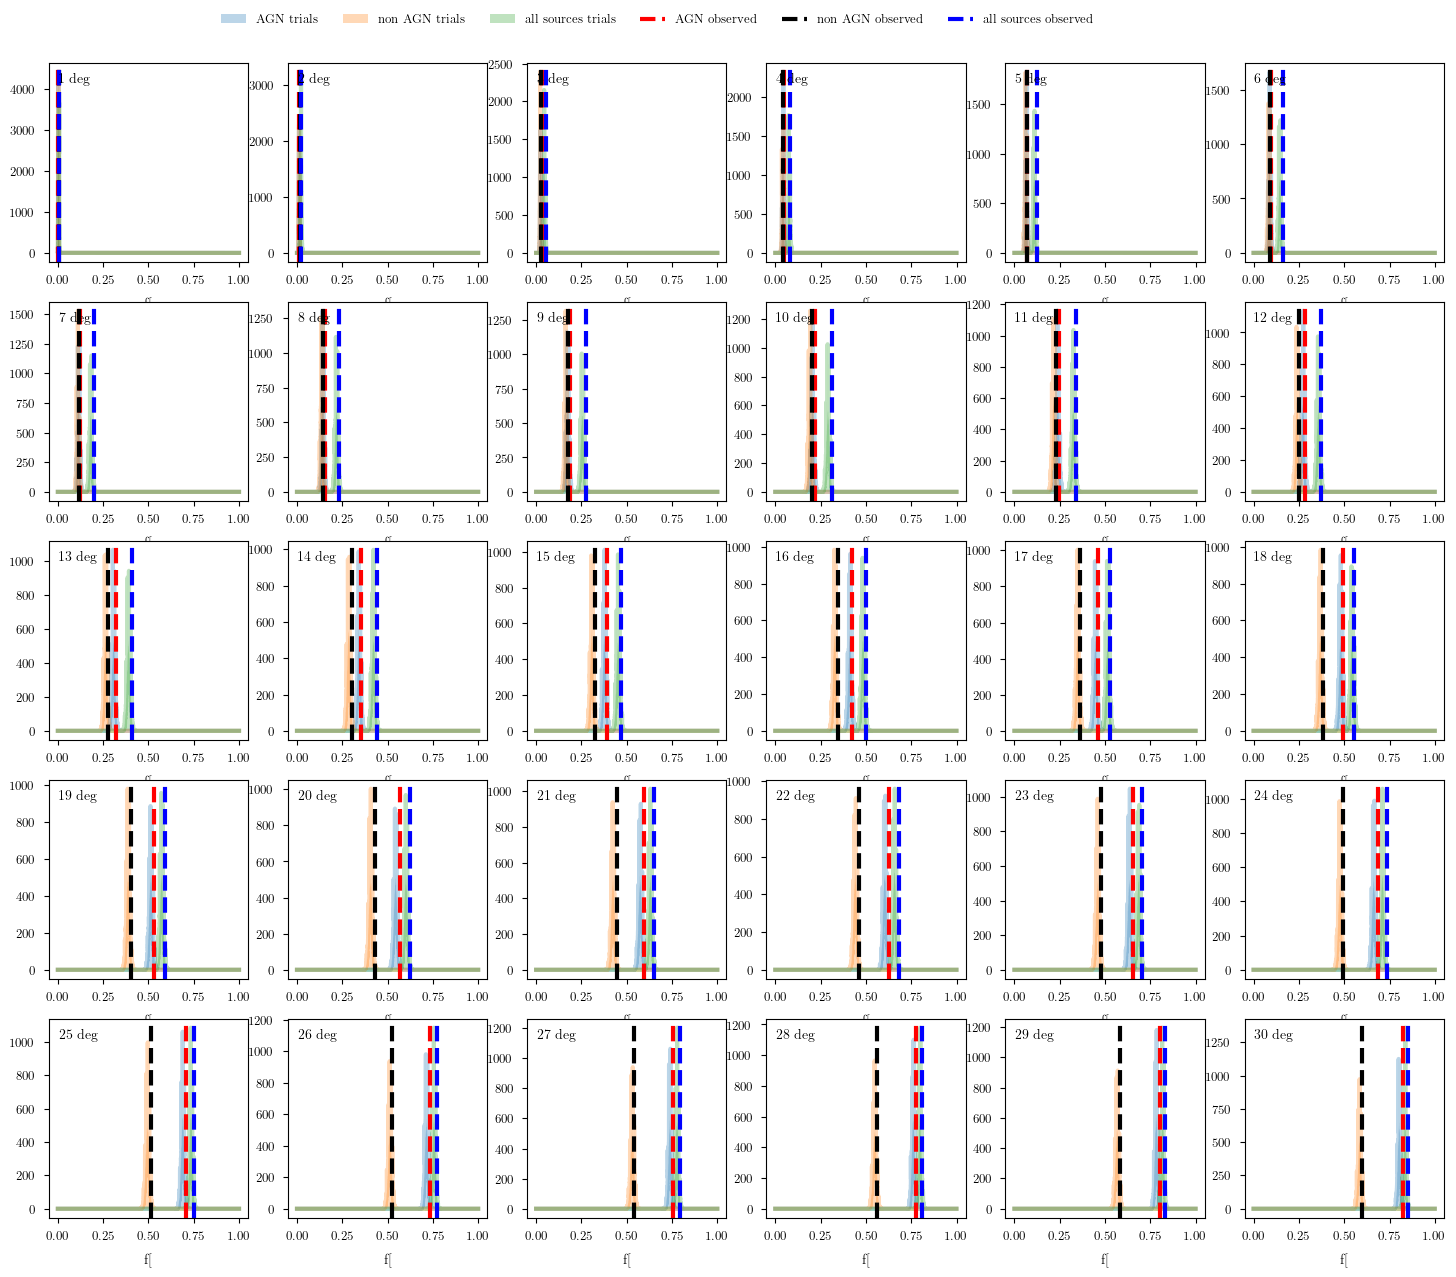

In [5]:
rows, cols = plotting.auto_grid_panels(30)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
axes = np.array(axes).reshape(-1)  # Flatten in case it's 2D
bins = np.arange(0,2500)/2500
pvals_AGN = np.zeros(len(steps))
pvals_nonAGN = np.zeros(len(steps))
pvals_all = np.zeros(len(steps))
for s in steps:
    i = s-1
    ax = axes[i]
    plotting.plot_ts_distributions(trials_AGN[f'fraction_{s}'],ax,i,'AGN', bins)
    plotting.plot_ts_distributions(trials_nonAGN[f'fraction_{s}'],ax,i,'non AGN', bins)
    plotting.plot_ts_distributions(trials_all[f'fraction_{s}'],ax,i,'all sources', bins)
    ax.axvline(results_AGN[f'fraction_{s}'], ls = '--', color = 'r', label = 'AGN observed')
    ax.axvline(results_nonAGN[f'fraction_{s}'], ls = '--', color = 'k', label = 'non AGN observed')
    ax.axvline(results_all[f'fraction_{s}'], ls = '--', color = 'b', label = 'all sources observed')
    ax.text(0.05, 0.95, f'{(s):.0f} deg', transform=ax.transAxes, ha='left', va='top')
    pvals_AGN[i] = statistics_utils.calculate_pvalue_from_trials(trials_AGN[f'fraction_{s}'], results_AGN[f'fraction_{s}'])
    pvals_nonAGN[i]= statistics_utils.calculate_pvalue_from_trials(trials_nonAGN[f'fraction_{s}'], results_nonAGN[f'fraction_{s}'])
    pvals_all[i] = statistics_utils.calculate_pvalue_from_trials(trials_all[f'fraction_{s}'], results_all[f'fraction_{s}'])
    if i !=0:
        params_AGN, covariance_AGN = plotting.fit_gaussian(trials_AGN[f'fraction_{s}'], bins)
        params_nonAGN, covariance_nonAGN = plotting.fit_gaussian(trials_nonAGN[f'fraction_{s}'], bins)
        params_all, covariance_all = plotting.fit_gaussian(trials_all[f'fraction_{s}'], bins)

axes[3].legend(frameon = False, bbox_to_anchor = (1.7, 1.3), ncol = 6)

plt.savefig('plots/TS_dist.pdf')

In [6]:
j = 0
pr = 1
fr = 0
for i, p in enumerate(pvals_AGN):
    if p < pr:
        pr = p
        j = i
        fr = results_AGN[f'fraction_{j+1}']
        best_radius_AGN = j+1

print(f'The lowest p_value found for the AGN case is {np.amin(pr)}, found for an angular distance of {j+1} degrees, \nand corresponding to a fraction of associated events {fr}, i.e. {fr*2536} out of 2536')

j = 0
pr = 1
fr = 0
for i, p in enumerate(pvals_nonAGN):
    if p < pr:
        pr = p
        j = i
        fr = results_nonAGN[f'fraction_{j+1}']
        best_radius_nonAGN = j+1

print(f'The lowest p_value found for the non-AGN case is {np.amin(pr)}, found for an angular distance of {j+1} degrees, \nand corresponding to a fraction of associated events {fr}, i.e. {fr*2536} out of 2536')

j = 0
pr = 1
fr = 0
for i, p in enumerate(pvals_all):
    if p < pr:
        pr = p
        j = i
        fr = results_all[f'fraction_{j+1}']
        best_radius_all = j+1

print(f'The lowest p_value found for the all the sources is {np.amin(pr)}, found for an angular distance of {j+1} degrees, \nand corresponding to a fraction of associated events {fr}, i.e. {fr*607} out of 607')

The lowest p_value found for the AGN case is 0.00576, found for an angular distance of 22 degrees, 
and corresponding to a fraction of associated events [0.6288425], i.e. [1594.74459203] out of 2536
The lowest p_value found for the non-AGN case is 0.010432, found for an angular distance of 20 degrees, 
and corresponding to a fraction of associated events [0.428463], i.e. [1086.58216319] out of 2536
The lowest p_value found for the all the sources is 0.005152, found for an angular distance of 24 degrees, 
and corresponding to a fraction of associated events [0.73358634], i.e. [445.28690702] out of 607


In [7]:
print('Significances in sigma:')
print(f'AGN: {statistics_utils.pval2sigma(0.00576)}')
print(f'non-AGN: {statistics_utils.pval2sigma(0.010432)}')
print(f'All sources: {statistics_utils.pval2sigma(0.005152)}')
print(f'All sources: {statistics_utils.pval2sigma(0.1047)}')

Significances in sigma:
AGN: 2.761139883136494
non-AGN: 2.5611709842106123
All sources: 2.7973731080172377
All sources: 1.6224828606957742


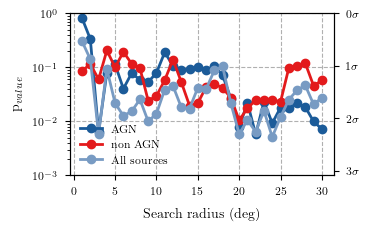

In [8]:
fig, ax1 = plt.subplots(1,1, figsize = set_size('prx_column', fraction=1, subplots=(1, 1)))

ax1.plot(steps, pvals_AGN, marker = 'o', color = blues[0],label = 'AGN')
ax1.plot(steps, pvals_nonAGN, marker = 'o', color = reds[1], label = 'non AGN')
ax1.plot(steps, pvals_all, marker = 'o', color = blues[2], label = 'All sources')
ax1.set_yscale('log')
ax1.set_ylim(1e-3, 1)
ax1.legend(frameon = False, loc = 'lower left')
ax1.grid(ls = '--')
ax1.set_xlabel('Search radius (deg)')
ax1.set_ylabel(r'p$_{value}$')

ax2 = ax1.twinx()
ax2.set_ylim(statistics_utils.pval2sigma(0.001, oneSided = True), 0)
ax2.set_yticks([3,2,1,0])
ax2.set_yticklabels([r'3$\sigma$',r'2$\sigma$',r'1$\sigma$',r'0$\sigma$'])

plt.savefig('plots/theta_vs_pval.pdf', dpi = 300)

In [9]:
llh_dist = np.load('../../notebooks_smbh/llh_test_trials.npy', allow_pickle=True)

In [10]:
ts = np.log10(np.amin(pvals_nonAGN)/np.amin(pvals_AGN))
print('Lambda =', ts, np.amin(pvals_nonAGN)/np.amin(pvals_AGN))

Lambda = 0.2579450949646329 1.8111111111111111


/var/folders/fk/wtd7q1cd3dj875v4s60j7xvm0000gn/T/ipykernel_10682/41281480.py:3: RuntimeWarning: divide by zero encountered in log10
  ax1.hist(np.log10(llh_dist), np.linspace(-5,5, 50), histtype = 'step', color = blues[0], lw = 2,label = 'TS distribution')


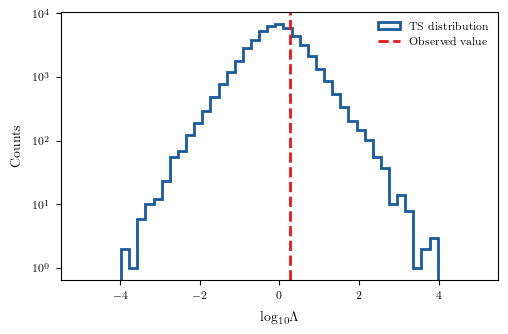

In [11]:
fig, ax1 = plt.subplots(1,1, figsize = set_size('prx_wide', fraction=0.8, subplots=(1, 1)))

ax1.hist(np.log10(llh_dist), np.linspace(-5,5, 50), histtype = 'step', color = blues[0], lw = 2,label = 'TS distribution')
ax1.axvline(ts, ls = '--', color = reds[1], label = 'Observed value')
ax1.legend(frameon = False)
ax1.set_yscale('log')
ax1.set_xlabel('log$_{10}\Lambda$')
ax1.set_ylabel('Counts')

plt.savefig('plots/llh_test.pdf', dpi = 300)

/var/folders/fk/wtd7q1cd3dj875v4s60j7xvm0000gn/T/ipykernel_10682/3278676240.py:20: RuntimeWarning: divide by zero encountered in log10
  ax2.hist(np.log10(llh_dist), np.linspace(-4,4, 50), histtype = 'step', color = blues[0], lw = 2,label = '$\Lambda$ distribution')


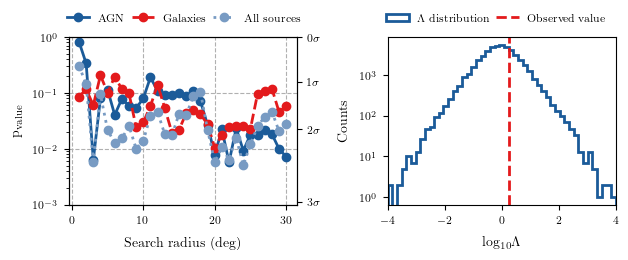

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = set_size('prx_wide', fraction=1, subplots=(1, 2)))

ax1.plot(steps, pvals_AGN, marker = 'o', color = blues[0],label = 'AGN')
ax1.plot(steps, pvals_nonAGN, marker = 'o', ls = '--', color = reds[1], label = 'Galaxies')
ax1.plot(steps, pvals_all, marker = 'o', ls = ':',color = blues[2], label = 'All sources')
ax1.set_yscale('log')
ax1.set_ylim(1e-3, 1)
ax1.legend(frameon = False, loc = 'lower left', ncols = 3,columnspacing=0.6, bbox_to_anchor=(-0.05, 1.02))
ax1.grid(ls = '--')
ax1.set_xlabel('Search radius (deg)')
ax1.set_ylabel(r'p$_{\mathrm{value}}$')

ax1_2 = ax1.twinx()
ax1_2.set_ylim(1e-3, 1)
ax1_2.set_yscale('log')
ax1_2.set_yticks([0.00114, 0.0225, 0.158, 1])
ax1_2.minorticks_off()
ax1_2.set_yticklabels([r'3$\sigma$',r'2$\sigma$',r'1$\sigma$',r'0$\sigma$'])

ax2.hist(np.log10(llh_dist), np.linspace(-4,4, 50), histtype = 'step', color = blues[0], lw = 2,label = '$\Lambda$ distribution')
ax2.axvline(ts, ls = '--', color = reds[1], label = 'Observed value')
ax2.legend(frameon = False, loc = 'lower left', ncols = 2,columnspacing=0.6, bbox_to_anchor=(-0.05, 1.02))
ax2.set_yscale('log')
ax2.set_xlim(-4,4)
ax2.set_xlabel('log$_{10}\Lambda$')
ax2.set_ylabel('Counts')

plt.subplots_adjust(wspace=0.4)

plt.savefig('plots/pvals_plot_paper.pdf', dpi = 300)

In [13]:
#we count the events associated for each source at the best radius
sources = pd.read_hdf('../data/all_sources_coords.h5', key = 'values')

In [14]:
mask_active = sources['Activity'] == True
mask_declination = sources['DEC_deg'] <44.8
sources = sources[mask_declination]
active_sources = sources[mask_active]
nonactive_sources = sources[~mask_active]

/var/folders/fk/wtd7q1cd3dj875v4s60j7xvm0000gn/T/ipykernel_10682/2470071032.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  active_sources = sources[mask_active]
/var/folders/fk/wtd7q1cd3dj875v4s60j7xvm0000gn/T/ipykernel_10682/2470071032.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nonactive_sources = sources[~mask_active]


In [15]:
events_associated_AGN = correlation.save_associated_events(
    active_sources, results_AGN['RA'][0], results_AGN['Dec'][0],best_radius_AGN)

In [16]:
events_associated_nonAGN = correlation.save_associated_events(
    nonactive_sources, results_nonAGN['RA'][0], results_nonAGN['Dec'][0],best_radius_nonAGN )

In [17]:
events_associated_all = correlation.save_associated_events(
    sources, results_all['RA'][0], results_all['Dec'][0],best_radius_all )

In [18]:
sources_dict_nonAGN = correlation.source_with_associated_events(events_associated_nonAGN, sources)
sources_dict_AGN = correlation.source_with_associated_events(events_associated_AGN, sources)
sources_dict_all = correlation.source_with_associated_events(events_associated_all, sources)

The source with the highest number of events is  NGC5516 and it has 187 events.
The source with the highest number of events is  NGC4945 and it has 228 events.
The source with the highest number of events is  NGC4945 and it has 268 events.


In [19]:
#the faxct is that I need to compare the number of events with the background expectation, because the event rate depends on the coordinate of the source.
#load trials 
trials_file_name = 'data/trials_minEnergy_20EeV_seed_in_0_seed_fin_10000.npy'
trials_files = glob.glob(trials_file_name)

trials = np.concatenate([np.load(f, allow_pickle = True) for f in trials_files])


In [20]:
def save_file_bkg_deviation(file, filename):
    counts = file.pop("counts")
    dev_bkg_df = pd.DataFrame(file)
    dev_bkg_arr = dev_bkg_df.to_records(index=False)
    np.save(filename,dev_bkg_arr)

In [21]:
# dev_bkg_nonAGN = statistics_utils.compute_deviation_from_bkg(sources_dict_nonAGN, trials, best_radius_nonAGN)

In [22]:
# save_file_bkg_deviation(dev_bkg_nonAGN, 'data/deviation_from_bkg_nonAGN.npy')

In [23]:
dev_bkg_nonAGN = np.load('data/deviation_from_bkg_nonAGN.npy', allow_pickle=True)

In [24]:
# dev_bkg_AGN = statistics_utils.compute_deviation_from_bkg(sources_dict_AGN, trials, best_radius_AGN)

In [25]:
# save_file_bkg_deviation(dev_bkg_AGN, 'data/deviation_from_bkg_AGN.npy')

In [26]:
dev_bkg_AGN = np.load('data/deviation_from_bkg_AGN.npy',allow_pickle=True)

In [27]:
# dev_bkg_all = statistics_utils.compute_deviation_from_bkg(sources_dict_all, trials, best_radius_all)

In [28]:
# save_file_bkg_deviation(dev_bkg_all, 'data/deviation_from_bkg_all.npy')

In [29]:
dev_bkg_all = np.load('data/deviation_from_bkg_all.npy', allow_pickle=True)

In [30]:
from scipy.interpolate import UnivariateSpline
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def make_excess_plot(sources_dict, trial_dict):
    sources_dict['deviation_from_BKG_median'] = sources_dict['n_events']-trial_dict['n_events']
    # sources_dict['counts'] = trial_dict['counts']
    sources_dict['quantile50'] = trial_dict['n_events']
    sources_dict['quantile16'] = trial_dict['quantile16']
    sources_dict['quantile84'] = trial_dict['quantile84']
    sources_dict['quantile3'] = trial_dict['quantile3']
    sources_dict['quantile97'] = trial_dict['quantile97']
    sources_dict['quantile0.1'] = trial_dict['quantile0.1']
    sources_dict['quantile99.9'] = trial_dict['quantile99.9']

    idx = np.argsort(sources_dict["src_dec"])
    sources_dict_plot = {k: v[idx] for k, v in sources_dict.items()}

    sources_dict_plot['src_name'], sources_dict_plot['deviation_from_BKG_median']
    idx =  np.argmax(sources_dict_plot['deviation_from_BKG_median'])
    print('Largest deviation from the background found for', sources_dict_plot['src_name'][idx], ' with', sources_dict_plot['deviation_from_BKG_median'][idx], 'above the median background counts' )

    print('Source coordinates:\n R.A.:',sources_dict_plot['src_ra'][idx], 'dec:', sources_dict_plot['src_dec'][idx])

    print('The SMBH in this source had mass:', sources_dict_plot['M_BH'][idx])

    dec_spline = sources_dict_plot['src_dec']
    spline_factor = 300
    # Build splines (s is smoothing factor; tweak if too wiggly)
    spl_q16_nonAGN = UnivariateSpline(dec_spline, sources_dict_plot['quantile50']-sources_dict_plot['quantile16'], s=spline_factor)
    spl_q84_nonAGN = UnivariateSpline(dec_spline, sources_dict_plot['quantile50']-sources_dict_plot['quantile84'], s=spline_factor)
    spl_q3_nonAGN  = UnivariateSpline(dec_spline, sources_dict_plot['quantile50']-sources_dict_plot['quantile3'],  s=spline_factor)
    spl_q97_nonAGN = UnivariateSpline(dec_spline, sources_dict_plot['quantile50']-sources_dict_plot['quantile97'], s=spline_factor)
    spl_q01_nonAGN = UnivariateSpline(dec_spline, sources_dict_plot['quantile50']-sources_dict_plot['quantile0.1'], s=spline_factor)
    spl_q999_nonAGN = UnivariateSpline(dec_spline, sources_dict_plot['quantile50']-sources_dict_plot['quantile99.9'],s=spline_factor)

    # Evaluate on a smooth grid
    dec_fine = np.linspace(dec_spline.min(), dec_spline.max(), 100)
    q16_s  = spl_q16_nonAGN(dec_fine)
    q84_s  = spl_q84_nonAGN(dec_fine)
    q3_s   = spl_q3_nonAGN(dec_fine)
    q97_s  = spl_q97_nonAGN(dec_fine)
    q01_s  = spl_q01_nonAGN(dec_fine)
    q999_s = spl_q999_nonAGN(dec_fine)

    splines_dict = {'dec_range':    dec_fine,
                    'q16_s':        q16_s,
                    'q84_s':        q84_s,
                    'q3_s':         q3_s,
                    'q97_s':        q97_s,
                    'q01_s':        q01_s,
                    'q999_s':       q999_s}


    fig, ax = plt.subplots(1,1, figsize = set_size('prx_column', fraction=1))


    plt.scatter(sources_dict_plot['src_dec'], sources_dict_plot['deviation_from_BKG_median'],c = blues[0])
    ax.fill_between(dec_fine,
                    q84_s, q16_s,
                    color = '#ffc816',alpha = 0.8, zorder =-100, label = '1$\sigma$' )
    ax.fill_between(dec_fine,
                    q97_s, q3_s, 
                    color = '#ffc816', alpha = 0.4, zorder =-500 , label = '2$\sigma$')
    ax.fill_between(dec_fine,
                    q999_s, q01_s,
                    color = '#ffc816',alpha = 0.2, zorder =-1000 , label = '3$\sigma$')

    ax.axhline(0, ls = '--', c = 'grey', lw = 3 )
    ax.set_xlabel('Source Dec (deg)')
    ax.set_ylabel('Observed counts - Bkg counts')
    ax.legend(frameon = False, ncols = 4, loc = 'upper center', bbox_to_anchor = (0.5,1.3))
    # plt.savefig('plot_results/deviation_from_bkg_new.pdf')

    return sources_dict_plot, splines_dict

Largest deviation from the background found for NGC5516  with 36.0 above the median background counts
Source coordinates:
 R.A.: 213.97791666666666 dec: -48.114805555555556
The SMBH in this source had mass: 3690000000.0


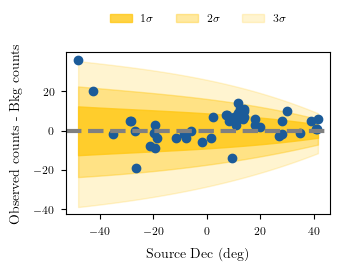

In [31]:
non_AGN_plot, splines_nonAGN = make_excess_plot(sources_dict_nonAGN, dev_bkg_nonAGN)

Largest deviation from the background found for NGC4945  with 39.0 above the median background counts
Source coordinates:
 R.A.: 196.364375 dec: -49.46802777777778
The SMBH in this source had mass: 1350000.0


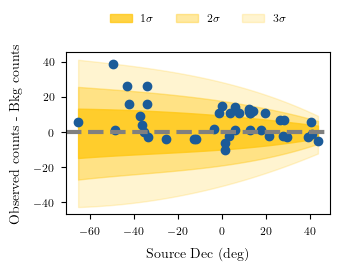

In [32]:
AGN_plot, splines_AGN = make_excess_plot(sources_dict_AGN, dev_bkg_AGN)

Largest deviation from the background found for NGC4945  with 44.0 above the median background counts
Source coordinates:
 R.A.: 196.364375 dec: -49.46802777777778
The SMBH in this source had mass: 1350000.0


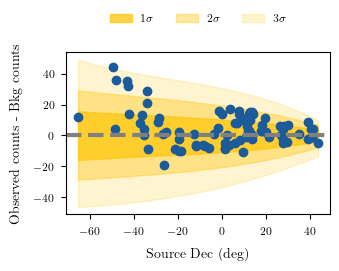

In [33]:
allsources_plot, splines_all = make_excess_plot(sources_dict_all, dev_bkg_all)

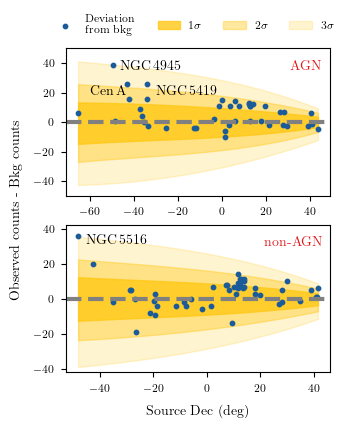

In [34]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = set_size('prx_column', fraction=1, subplots=(2, 1)))


ax1.scatter(AGN_plot['src_dec'], AGN_plot['deviation_from_BKG_median'], color = blues[0], s= 10,label ='Deviation\nfrom bkg')
ax1.fill_between(splines_AGN['dec_range'],
                 splines_AGN['q84_s'], splines_AGN['q16_s'], 
                 color = '#ffc816',alpha = 0.8, zorder =-100, label = '1$\sigma$' )
ax1.fill_between(splines_AGN['dec_range'],
                 splines_AGN['q97_s'], splines_AGN['q3_s'], 
                 color = '#ffc816', alpha = 0.4, zorder =-500 , label = '2$\sigma$')
ax1.fill_between(splines_AGN['dec_range'],
                 splines_AGN['q999_s'], splines_AGN['q01_s'],
                 color = '#ffc816',alpha = 0.2, zorder =-1000 , label = '3$\sigma$')
# plt.text(2, 11, 'NGC 1068')p
ax1.text(-46.46802777777778, 35, 'NGC\,4945')
ax1.text(-60, 18.5, 'Cen\,A')
ax1.text(-30, 18, 'NGC\,5419')
ax1.axhline(0, ls = '--', c = 'grey', lw = 3 )
ax1.set_xlabel('Source Dec (deg)')
ax1.set_ylabel('Observed counts - Bkg counts', y = -0.1)
ax1.set_ylim(-50,50)
ax1.text(0.85,0.85 , 'AGN', color = reds[1], transform=ax1.transAxes, weight = 'bold')

ax1.legend(frameon = False, ncols = 4, bbox_to_anchor = (1.05,1.3))


ax2.scatter(non_AGN_plot['src_dec'], non_AGN_plot['deviation_from_BKG_median'], color = blues[0], s= 10,label ='Deviation\nfrom bkg')
ax2.fill_between(splines_nonAGN['dec_range'],
                 splines_nonAGN['q84_s'], splines_nonAGN['q16_s'], 
                 color = '#ffc816',alpha = 0.8, zorder =-100, label = '1$\sigma$' )
ax2.fill_between(splines_nonAGN['dec_range'],
                 splines_nonAGN['q97_s'], splines_nonAGN['q3_s'], 
                 color = '#ffc816', alpha = 0.4, zorder =-500 , label = '2$\sigma$')
ax2.fill_between(splines_nonAGN['dec_range'],
                 splines_nonAGN['q999_s'], splines_nonAGN['q01_s'],
                 color = '#ffc816',alpha = 0.2, zorder =-1000 , label = '3$\sigma$')
ax2.text(-45.33908333333333, 31, 'NGC\,5516')
ax2.axhline(0, ls = '--', c = 'grey', lw = 3 )
ax2.set_xlabel('Source Dec (deg)')
ax2.set_ylim(-42,42)

ax2.text(0.75,0.85 , 'non-AGN', color = reds[1], transform=ax2.transAxes, weight = 'bold')
# ax.set_ylabel('Observed counts - Bkg counts')

plt.savefig('plots/fig_excesses_separate.pdf')

In [35]:
active= []
for entry in sources.iloc:
    if entry["Activity"] == True:
        active.append(entry["Input"])

/var/folders/fk/wtd7q1cd3dj875v4s60j7xvm0000gn/T/ipykernel_10682/467751633.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(allsources_plot['src_dec'][i], allsources_plot['deviation_from_BKG_median'][i],c = reds[1])


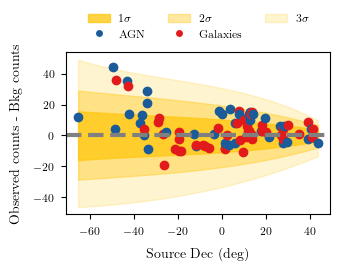

In [36]:
fig, ax = plt.subplots(1,1, figsize = set_size('prx_column', fraction=1))


for i, source in enumerate(allsources_plot['src_name']):
    if np.isin(source, active):
        plt.scatter(allsources_plot['src_dec'][i], allsources_plot['deviation_from_BKG_median'][i],c = blues[0])
    else:
        plt.scatter(allsources_plot['src_dec'][i], allsources_plot['deviation_from_BKG_median'][i],c = reds[1])
ax.fill_between(splines_all['dec_range'],
                 splines_all['q84_s'], splines_all['q16_s'],
                 color = '#ffc816',alpha = 0.8, zorder =-100, label = '1$\sigma$' )
ax.fill_between(splines_all['dec_range'],
                 splines_all['q97_s'], splines_all['q3_s'],
                 color = '#ffc816', alpha = 0.4, zorder =-500 , label = '2$\sigma$')
ax.fill_between(splines_all['dec_range'],
                 splines_all['q999_s'], splines_all['q01_s'],
                 color = '#ffc816',alpha = 0.2, zorder =-1000 , label = '3$\sigma$')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='AGN',
           markerfacecolor=blues[0], markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Galaxies',
           markerfacecolor=reds[1], markersize=6),
]
handles, labels = ax.get_legend_handles_labels()
handles.extend(legend_elements)

ax.axhline(0, ls = '--', c = 'grey', lw = 3 )
ax.set_xlabel('Source Dec (deg)')
ax.set_ylabel('Observed counts - Bkg counts')
order = [0,3,1,4,2]
ax.legend(handles=[handles[idx] for idx in order], frameon = False, ncols = 3, loc = 'upper center', bbox_to_anchor = (0.5,1.3))
plt.savefig('plots/deviation_from_bkg_new.pdf')

In [37]:
events_associated_all_3deg= correlation.save_associated_events(
    sources, results_all['RA'][0], results_all['Dec'][0],3)

In [38]:
sources_dict_all_3deg = correlation.source_with_associated_events(events_associated_all_3deg, sources)

The source with the highest number of events is  ESO 97-G13 and it has 7 events.


In [39]:
# dev_bkg_3deg = statistics_utils.compute_deviation_from_bkg(sources_dict_all_3deg, trials, 3)

In [40]:
# save_file_bkg_deviation(dev_bkg_3deg, 'data/deviation_from_bkg_all_3deg.npy')

In [41]:
dev_bkg_3deg = np.load('data/deviation_from_bkg_all_3deg.npy', allow_pickle=True)

Largest deviation from the background found for NGC3607  with 5.0 above the median background counts
Source coordinates:
 R.A.: 169.22779166666666 dec: 18.05177777777778
The SMBH in this source had mass: 137000000.0


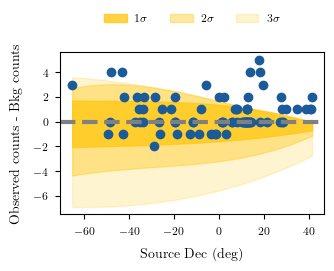

In [42]:
allsources_plot_3deg, splines_all_deg = make_excess_plot(sources_dict_all_3deg, dev_bkg_3deg)